In [2]:
from Conv_Model import Conv_Net
from Trainer import Trainer
from Flat_Model import Linear_Net
from main import plot_loss, k_fold_cross_validation

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
digits = datasets.load_digits()
ims, labs = digits.images, digits.target

X_train, X_test, y_train, y_test = k_fold_cross_validation(ims, labs, 5).__next__()


rttL, rttC = 3, 8

trainerL = Trainer(Linear_Net, X_train, y_train, X_test, y_test)
trainerC = Trainer(Conv_Net, X_train, y_train, X_test, y_test)

## Train models and get training loss
Lloss, LinTrainAcc = trainerL.train(epochs=rttL, plot_loss=True)
Closs, ConTrainAcc = trainerC.train(epochs=rttC, plot_loss=True)

## Test models and get accuracy
accL = trainerL.test()
accC = trainerC.test()


Epoch: 1/3, Model: Linear_Net


100%|##########| 1438/1438 [00:04<00:00, 289.65it/s]


Epoch 1 Accuracy: 0.8101529902642559

Epoch: 2/3, Model: Linear_Net


100%|##########| 1438/1438 [00:04<00:00, 295.17it/s]


Epoch 2 Accuracy: 0.9429763560500696

Epoch: 3/3, Model: Linear_Net


100%|##########| 1438/1438 [00:04<00:00, 295.89it/s]


Epoch 3 Accuracy: 0.9534075104311543

Epoch: 1/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 261.44it/s]


Epoch 1 Accuracy: 0.5458970792767733

Epoch: 2/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 263.43it/s]


Epoch 2 Accuracy: 0.8171070931849791

Epoch: 3/8, Model: Conv_Net


100%|##########| 1438/1438 [00:04<00:00, 288.70it/s]


Epoch 3 Accuracy: 0.8678720445062587

Epoch: 4/8, Model: Conv_Net


100%|##########| 1438/1438 [00:04<00:00, 300.45it/s]


Epoch 4 Accuracy: 0.9054242002781642

Epoch: 5/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 272.17it/s]


Epoch 5 Accuracy: 0.9255910987482615

Epoch: 6/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 275.83it/s]


Epoch 6 Accuracy: 0.9339360222531293

Epoch: 7/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 256.73it/s]


Epoch 7 Accuracy: 0.9436717663421419

Epoch: 8/8, Model: Conv_Net


100%|##########| 1438/1438 [00:05<00:00, 268.96it/s]


Epoch 8 Accuracy: 0.9624478442280946


In [11]:
accL, accC

(0.9526462395543176, 0.9331476323119777)

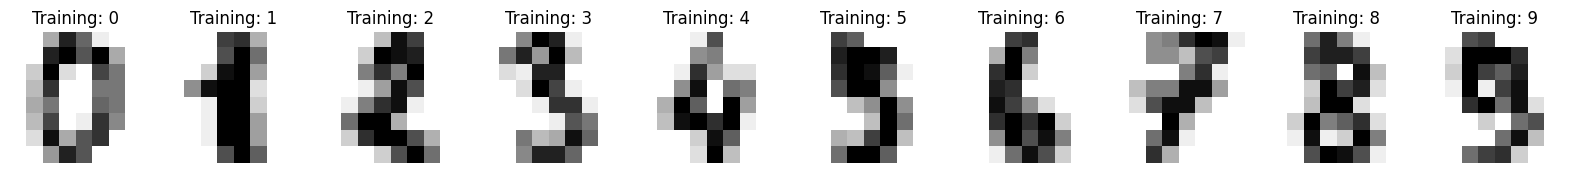

In [12]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

def plot_image(image, target, predicted=None):
    if predicted is None:
        predicted = [None] * len(target)
    n_ims = image.shape[0]

    if not n_ims == 1:
        _, axes = plt.subplots(nrows=1, ncols=n_ims, figsize=(20, n_ims))
        for ax, im, label, pred in zip(axes, image, target, predicted):
            ax.set_axis_off()
            ax.imshow(im, cmap=plt.cm.gray_r, interpolation="nearest")
            ax.set_title("Label: %i" % label)
            if pred is not None:
                ax.set_title("Label: %i, Pred: %i" % (label, pred))
    else:
        plt.figure()
        plt.axis("off")
        plt.imshow(np.squeeze(image[0]), cmap=plt.cm.gray_r, interpolation="nearest")
        plt.title("Label: {}".format(target[0]))
        if predicted is not None:
            plt.title("Label: {}, Pred: {}".format(target[0], predicted[0]))
        

    plt.show()


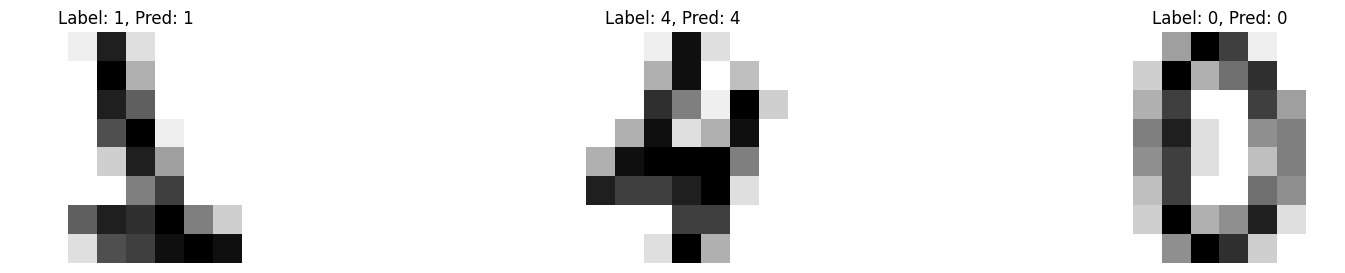

In [13]:
def prep_ims(ims, labs):
    if len(ims.shape) == 3:
        ims = ims.reshape(ims.shape[0], ims.shape[1], ims.shape[2], 1)

    elif len(ims.shape) == 2:
        ims = np.array([ims])

    if isinstance(labs, np.int32):
        labs = np.array([labs])

    return ims, labs

test_im = digits.images[1000:1003]
targs = digits.target[1000:1003]

test_im, targs = prep_ims(test_im, targs)
test_im.shape, targs.shape

preds, conf = trainerL.test(X=test_im)
pred2, conf2 = trainerC.test(X=test_im)

plot_image(test_im, targs, preds)

In [14]:
import pickle

with open('drawing/image.pkl', 'rb') as f:
    contents = []
    while True:
        try:
            contents.append(pickle.load(f))
        except EOFError:
            break
    contents = np.array(contents)

drawn_im, _ = prep_ims(contents, None)
preds, conf = trainerL.test(X=drawn_im)
preds

array([4., 7., 1., 1., 4., 4., 7., 7., 7., 9., 4., 7.])

In [12]:
import threading
from drawing.draw_thread import draw_and_save

if input('Drawing will commence. Would you like to draw a number in another window? y/[n]') == 'y':
    display('A NEW DRAWING WINDOW WILL OPEN IN A FEW SECONDS')

    def run_in_thread():
        global other_array
        other_array = draw_and_save()

    thread = threading.Thread(target=run_in_thread)
    thread.start()
else: display('Drawing will not commence. Please re-run the cell if you would like to draw a number.')


'A NEW DRAWING WINDOW WILL OPEN IN A FEW SECONDS'

In [13]:
try:
    drawn_im, _ = prep_ims(other_array, None)
    pred, conf = trainerL.test(X=drawn_im)
    display('Model predicted: {}'.format(int(pred[0])))
except NameError:
    display('Drawing did not commence. Please re-run the cell above if you would like to draw a number.')

'Model predicted: 4'